In [2]:
import opsimsummaryv2 as op
import importlib
import pandas as pd
from sqlalchemy import inspect
from pathlib import Path
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from sklearn.neighbors import BallTree
from astropy.time import Time
from multiprocessing import Pool
import sqlalchemy as sqla
import os 

plt.style.use(['seaborn-v0_8-deep', os.environ['HOME'] + '/.matplotlib_style/paper.mplstyle'])


In [3]:
OpSimSurv = op.OpSimSurvey('/global/homes/b/bastienc/MY_SNANA_DIR/lsst_db/baseline_v3.3_10yrs.db')

Reading from database sqlite:////global/homes/b/bastienc/MY_SNANA_DIR/lsst_db/baseline_v3.3_10yrs.db
Read N = 2131089 observations in 29.69 seconds.
No host file.


In [4]:
OpSimSurv.compute_hp_rep(nside=256, minVisits=500, maxVisits=1100)

Finished compute healpy representation, total number of fields : 386897.


In [5]:
from healpy.newvisufunc import projview, newprojplot

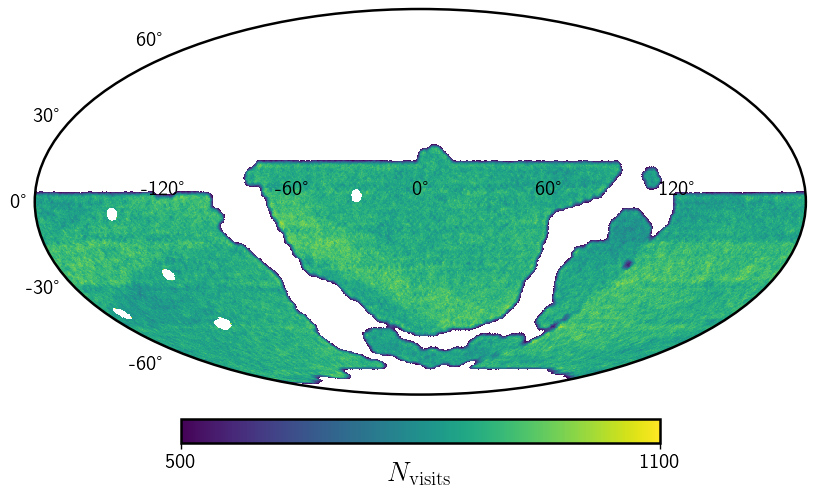

In [6]:

ipix_map = np.zeros(hp.nside2npix(OpSimSurv.hp_rep.attrs["nside"]))
ipix_map[OpSimSurv.hp_rep.index.values] = OpSimSurv.hp_rep.n_visits.values
ipix_map[ipix_map==0] = np.inf

ipix_map= np.ma.masked_invalid(ipix_map)
cmap = plt.cm.viridis
cmap.set_bad('b', 1)

fig = projview(
    ipix_map,
    rot=[-180, 0, 0],
    coord=["E"],
    flip='geo',
    min=500,
    max=1100,
    graticule=True,
    graticule_labels=True,
    unit="$N_\mathrm{visits}$",
    cb_orientation="horizontal",
    projection_type="mollweide",
    cmap=cmap,
    fontsize={
        "xlabel": 15,
        "ylabel": 15,
        "xtick_label": 15,
        "ytick_label": 15,
        "cbar_label": 20,
        "cbar_tick_label": 15,
    },
);

plt.grid(False)


ticks = np.linspace(-120, 120, 5)  # Original tick positions
tick_labels = [f"{np.round(t):.0f}°" for t in ticks]  # Convert to degrees

# Set the custom ticks
fig.axes.set_xticks(np.radians(ticks))
fig.axes.set_xticklabels(tick_labels);

plt.savefig('../Figures/hp_view.pdf', dpi=None, bbox_inches='tight')